## Importing Librareis

In [16]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
#import decision_tree_regressor as dtr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import VotingRegressor

## Reading Dataset

In [17]:
# Read the data from the xlsx file
df = pd.read_excel('Halodule_pinifolia.xlsx', sheet_name='Sheet1')
df.head()

,latitude_c,longitude_,species,2050AOGCM.RCP26.Surface.Salinity.Mean,2050AOGCM.RCP26.Surface.Temperature.Max,2050AOGCM.RCP26.Surface.Temperature.Mean,2050AOGCM.RCP26.Surface.Temperature.Min,2050AOGCM.RCP85.Surface.Temperature.Max,2050AOGCM.RCP85.Surface.Salinity.Mean,2100AOGCM.RCP26.Surface.Salinity.Mean,...,2100AOGCM.RCP85.Surface.Salinity.Mean,2100AOGCM.RCP26.Surface.Temperature.Mean,2100AOGCM.RCP85.Surface.Salinity.Mean2,2100AOGCM.RCP26.Surface.Temperature.Max2,2100AOGCM.RCP85.Surface.Temperature.Mean3,2100AOGCM.RCP85.Surface.Temperature.Min,Present.Surface.Salinity.Mean,Present.Surface.Temperature.Max,Present.Surface.Temperature.Mean,Present.Surface.Temperature.Min
0,43.0536,144.9063,Halodule_pinifolia,32.231201,20.718201,9.50725,0.281575,20.949499,9.43316,32.0228,...,32.041599,20.031401,32.041599,20.031401,12.5417,2.54157,32.247695,18.897469,8.248602,-0.89614
1,43.0549,144.9061,Halodule_pinifolia,32.231201,20.718201,9.50725,0.281575,20.949499,9.43316,32.0228,...,32.041599,20.031401,32.041599,20.031401,12.5417,2.54157,32.247695,18.897469,8.248602,-0.89614
2,43.0549,144.9061,Halodule_pinifolia,32.231201,20.718201,9.50725,0.281575,20.949499,9.43316,32.0228,...,32.041599,20.031401,32.041599,20.031401,12.5417,2.54157,32.247695,18.897469,8.248602,-0.89614
3,43.0603,144.9060,Halodule_pinifolia,32.231201,20.718201,9.50725,0.281575,20.949499,9.43316,32.0228,...,32.041599,20.031401,32.041599,20.031401,12.5417,2.54157,32.247695,18.897469,8.248602,-0.89614
4,43.0603,144.9060,Halodule_pinifolia,32.231201,20.718201,9.50725,0.281575,20.949499,9.43316,32.0228,...,32.041599,20.031401,32.041599,20.031401,12.5417,2.54157,32.247695,18.897469,8.248602,-0.89614


## Cehcking Null values

In [18]:
#checking null values
df.isnull().sum()

latitude_c                                   0
longitude_                                   0
species                                      0
2050AOGCM.RCP26.Surface.Salinity.Mean        0
2050AOGCM.RCP26.Surface.Temperature.Max      0
2050AOGCM.RCP26.Surface.Temperature.Mean     0
2050AOGCM.RCP26.Surface.Temperature.Min      0
2050AOGCM.RCP85.Surface.Temperature.Max      0
2050AOGCM.RCP85.Surface.Salinity.Mean        0
2100AOGCM.RCP26.Surface.Salinity.Mean        0
2100AOGCM.RCP26.Surface.Temperature.Max      0
2100AOGCM.RCP85.Surface.Temperature.Mean     0
2100AOGCM.RCP26.Surface.Temperature.Min      0
2100AOGCM.RCP85.Surface.Salinity.Mean        0
2100AOGCM.RCP26.Surface.Temperature.Mean     0
2100AOGCM.RCP85.Surface.Salinity.Mean2       0
2100AOGCM.RCP26.Surface.Temperature.Max2     0
2100AOGCM.RCP85.Surface.Temperature.Mean3    0
2100AOGCM.RCP85.Surface.Temperature.Min      0
Present.Surface.Salinity.Mean                0
Present.Surface.Temperature.Max              0
Present.Surfa

In [19]:
#descriptive statistics
df.describe()

,latitude_c,longitude_,2050AOGCM.RCP26.Surface.Salinity.Mean,2050AOGCM.RCP26.Surface.Temperature.Max,2050AOGCM.RCP26.Surface.Temperature.Mean,2050AOGCM.RCP26.Surface.Temperature.Min,2050AOGCM.RCP85.Surface.Temperature.Max,2050AOGCM.RCP85.Surface.Salinity.Mean,2100AOGCM.RCP26.Surface.Salinity.Mean,2100AOGCM.RCP26.Surface.Temperature.Max,...,2100AOGCM.RCP85.Surface.Salinity.Mean,2100AOGCM.RCP26.Surface.Temperature.Mean,2100AOGCM.RCP85.Surface.Salinity.Mean2,2100AOGCM.RCP26.Surface.Temperature.Max2,2100AOGCM.RCP85.Surface.Temperature.Mean3,2100AOGCM.RCP85.Surface.Temperature.Min,Present.Surface.Salinity.Mean,Present.Surface.Temperature.Max,Present.Surface.Temperature.Mean,Present.Surface.Temperature.Min
count,13236.000000,13236.000000,13236.000000,13236.000000,13236.000000,13236.000000,13236.000000,13236.000000,13236.000000,13236.000000,...,13236.000000,13236.000000,13236.000000,13236.000000,13236.000000,13236.000000,13236.000000,13236.000000,13236.000000,13236.000000
mean,34.859715,136.270772,4.525627,-2.003860,-10.052831,-17.183090,-1.838927,-9.896928,4.408792,-2.464328,...,4.303336,-2.464328,4.303336,-2.464328,-7.696981,-15.243064,4.580782,-3.362230,-11.134734,-18.130515
std,7.545345,10.472571,536.794058,536.454739,536.044094,535.686049,536.463587,536.053704,536.787828,536.431350,...,536.782176,536.431350,536.782176,536.431350,536.166361,535.786585,536.797031,536.384261,535.987865,535.636224
min,-27.500000,-177.080210,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,31.168000,130.589900,33.087002,25.378799,15.195300,5.607990,25.475100,15.315200,33.020599,24.620300,...,32.859402,24.620300,32.859402,24.620300,17.783501,7.880330,33.144771,23.605780,13.889836,4.870306
50%,35.319400,139.800300,33.538300,28.006701,20.334400,13.519000,28.174900,20.606899,33.438000,27.609400,...,33.304001,27.609400,33.304001,27.609400,22.495899,15.401700,33.554664,26.906811,19.286827,12.536248
75%,39.375700,141.947200,33.578400,30.499700,23.711100,17.897200,30.627100,23.959400,33.467098,30.039900,...,33.411598,30.039900,33.411598,30.039900,25.757999,19.552401,33.650994,29.222153,22.766529,17.063875
max,43.067600,179.843833,38.808399,32.973999,30.376100,29.102600,33.343700,30.712799,38.784100,32.422199,...,38.791801,32.422199,38.791801,32.422199,32.470200,31.257400,38.738699,31.809994,29.633245,28.513990


# Checking Distribution

C:\Users\abdul\AppData\Local\Temp\ipykernel_260\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


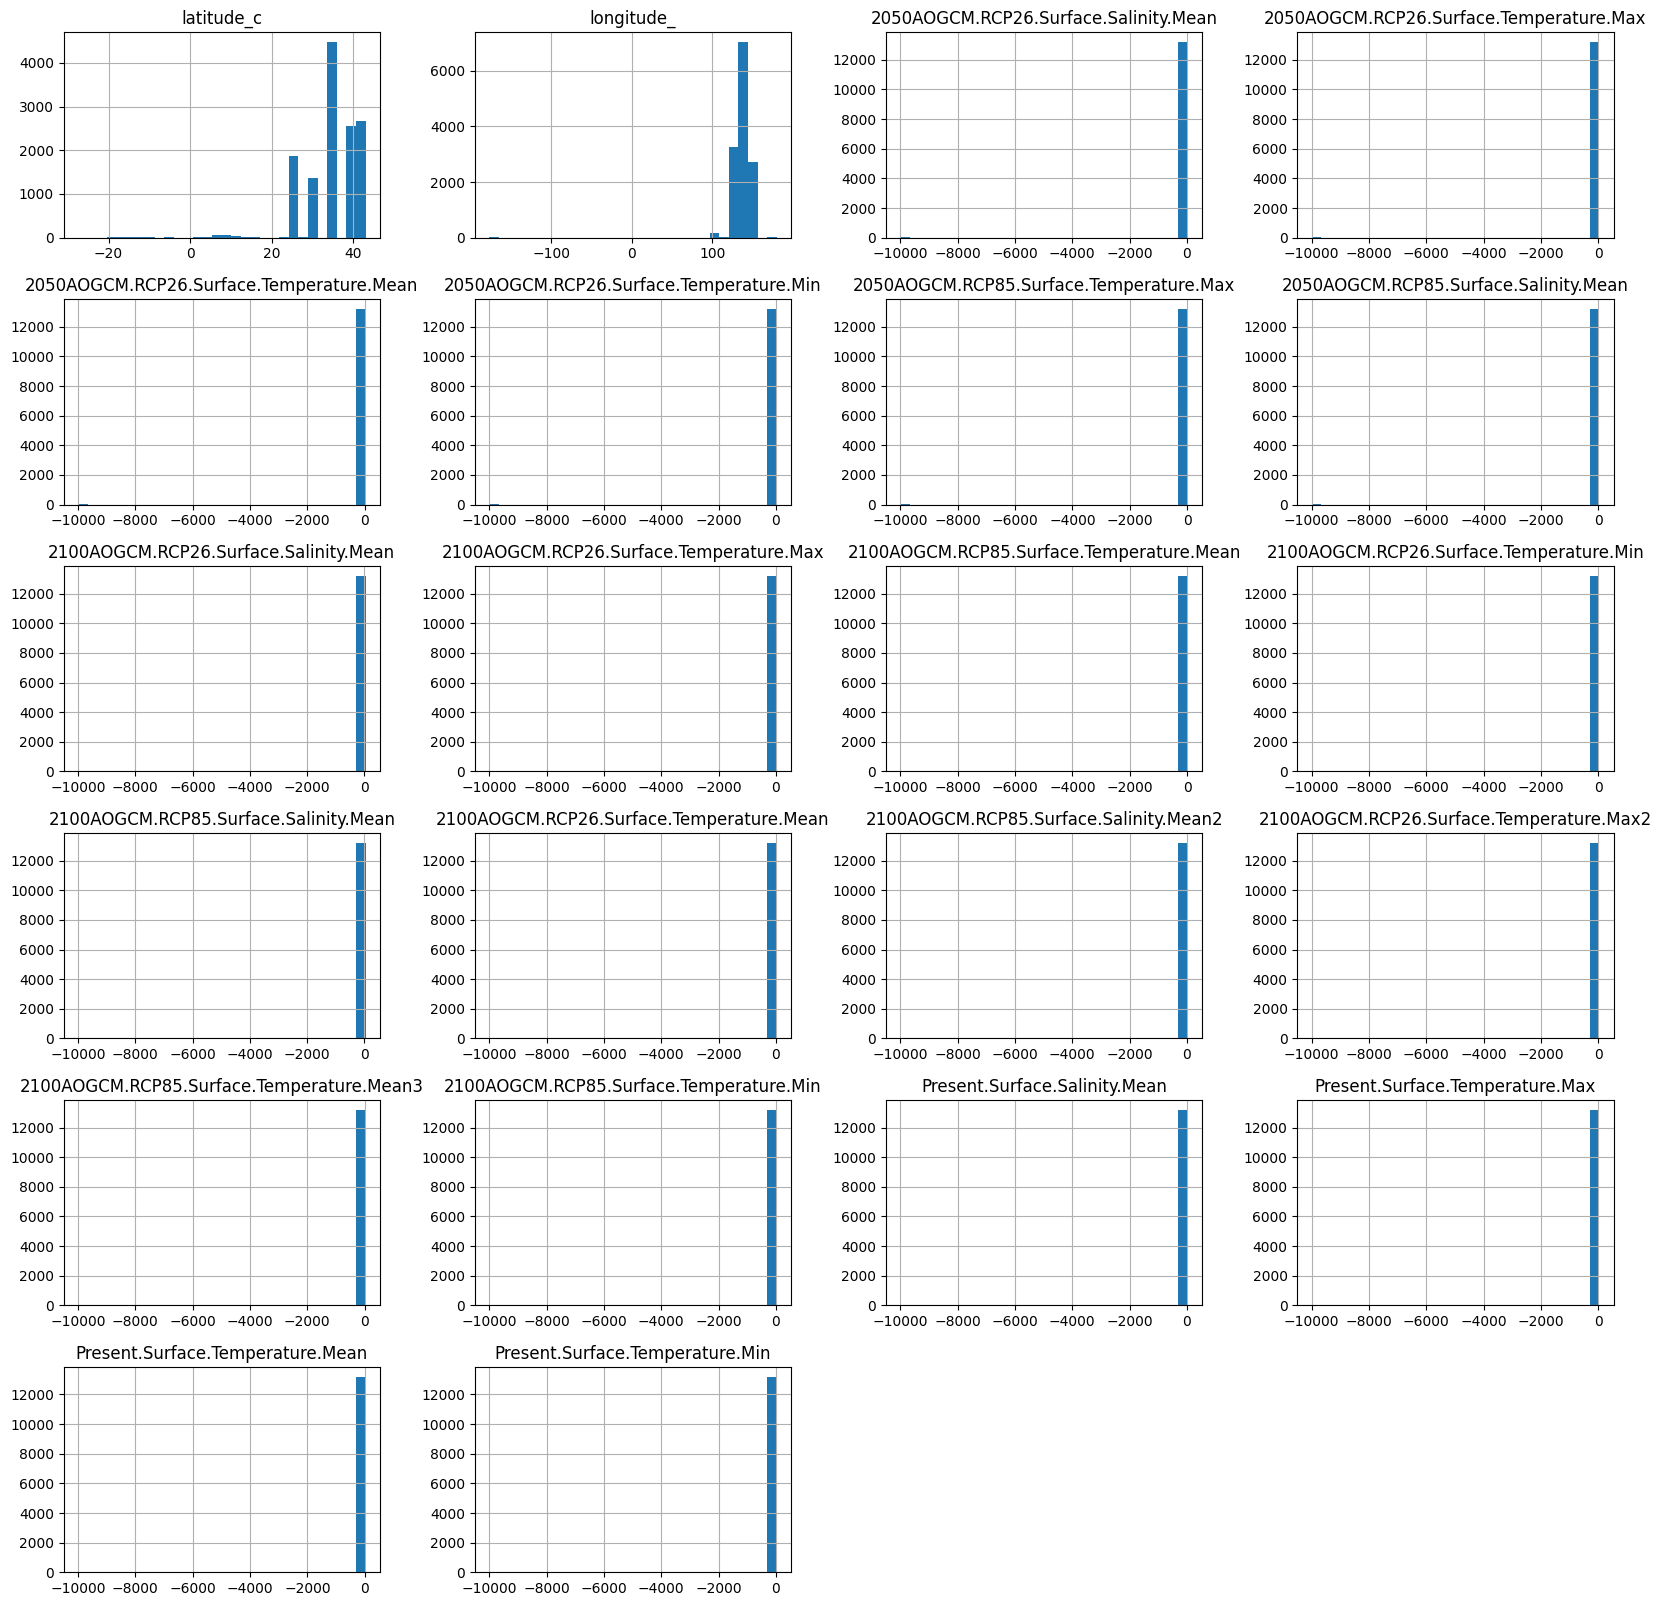

C:\Users\abdul\AppData\Local\Temp\ipykernel_260\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


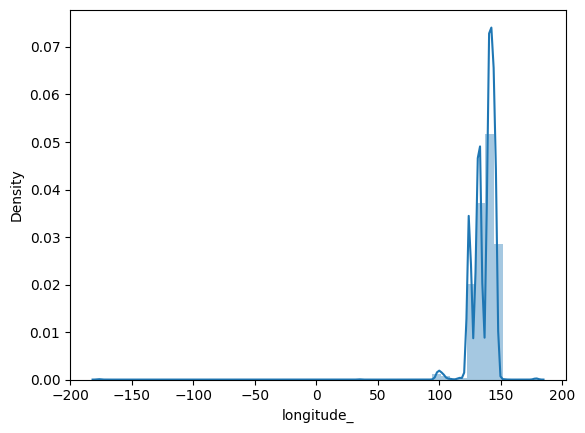

C:\Users\abdul\AppData\Local\Temp\ipykernel_260\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


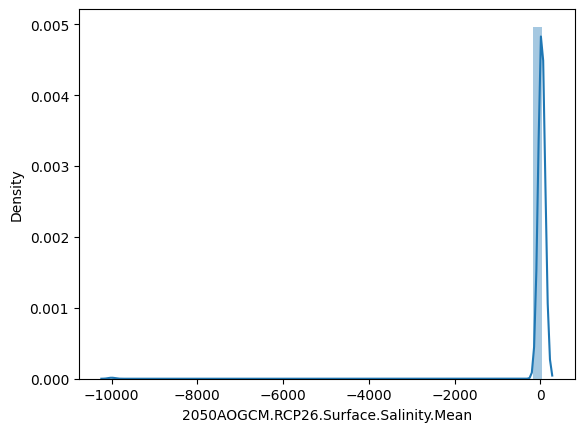

C:\Users\abdul\AppData\Local\Temp\ipykernel_260\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


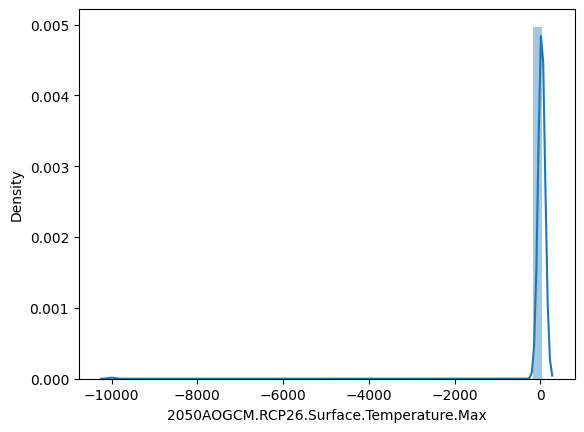

C:\Users\abdul\AppData\Local\Temp\ipykernel_260\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


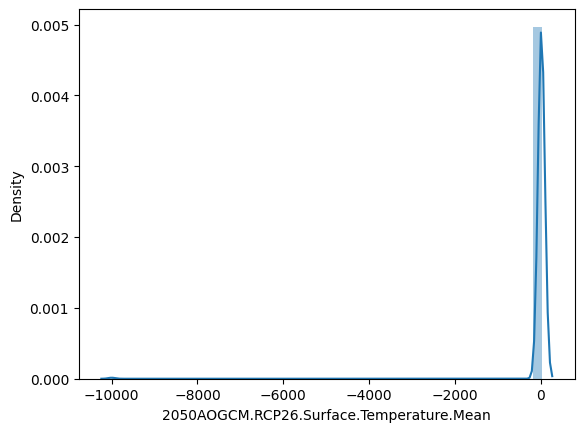

C:\Users\abdul\AppData\Local\Temp\ipykernel_260\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


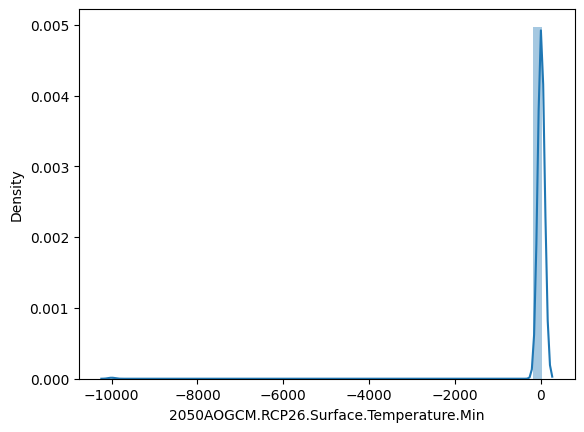

C:\Users\abdul\AppData\Local\Temp\ipykernel_260\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


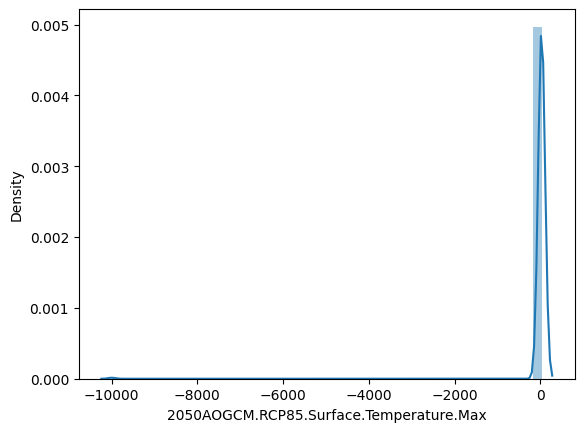

C:\Users\abdul\AppData\Local\Temp\ipykernel_260\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


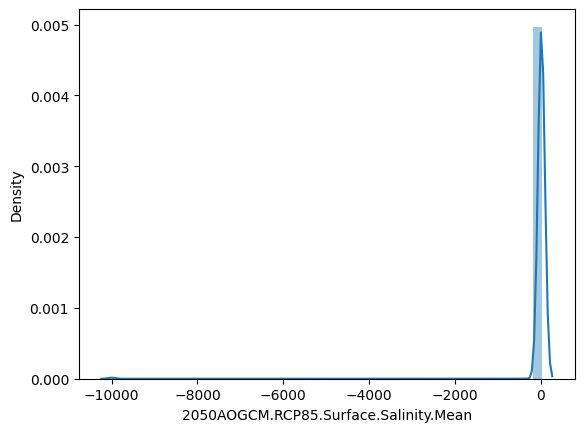

C:\Users\abdul\AppData\Local\Temp\ipykernel_260\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


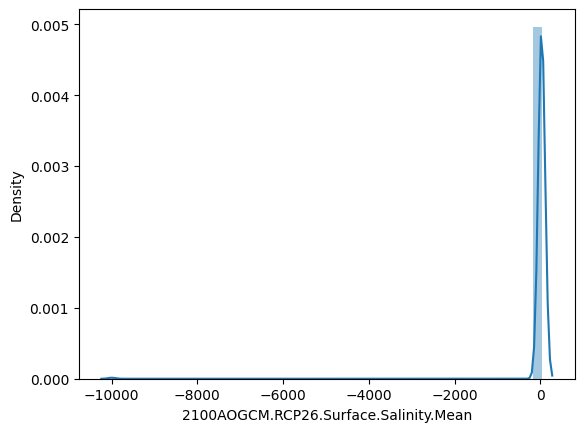

C:\Users\abdul\AppData\Local\Temp\ipykernel_260\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


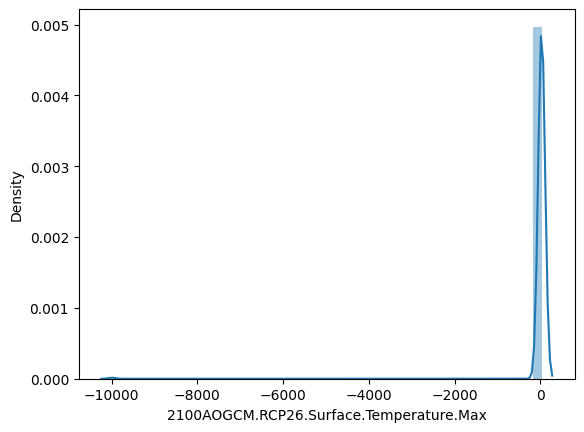

C:\Users\abdul\AppData\Local\Temp\ipykernel_260\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


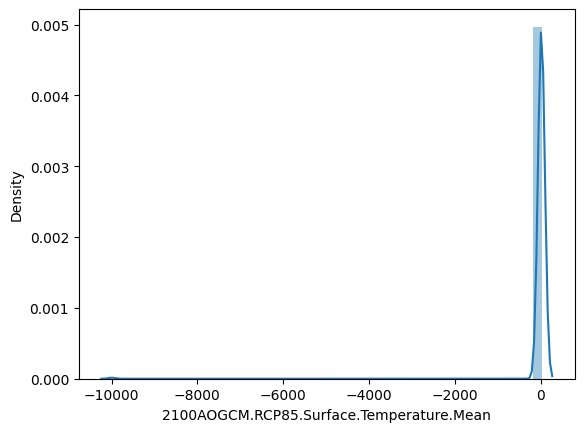

C:\Users\abdul\AppData\Local\Temp\ipykernel_260\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


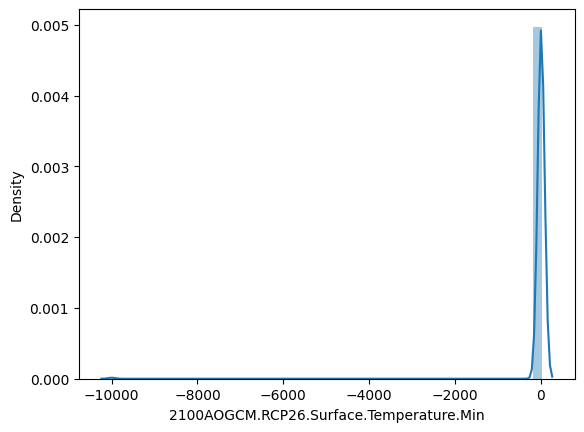

C:\Users\abdul\AppData\Local\Temp\ipykernel_260\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


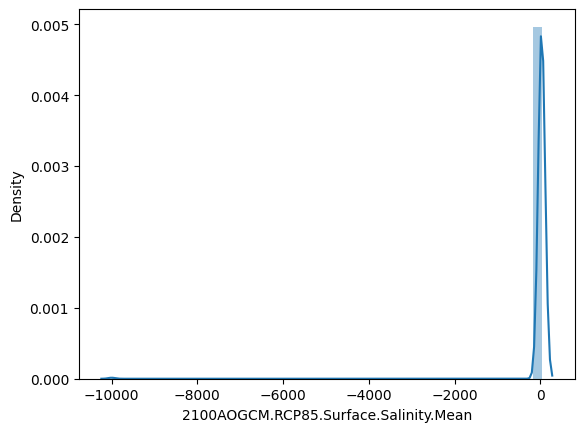

C:\Users\abdul\AppData\Local\Temp\ipykernel_260\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


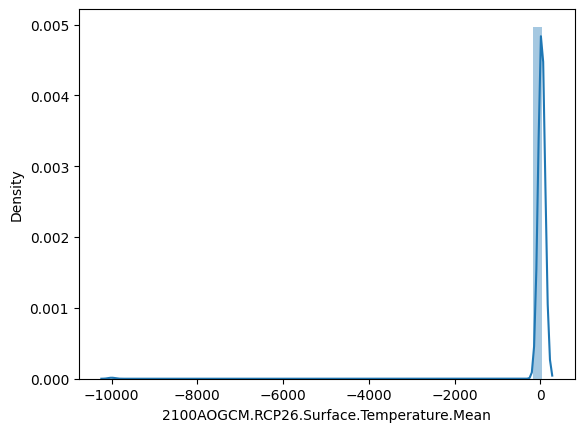

C:\Users\abdul\AppData\Local\Temp\ipykernel_260\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


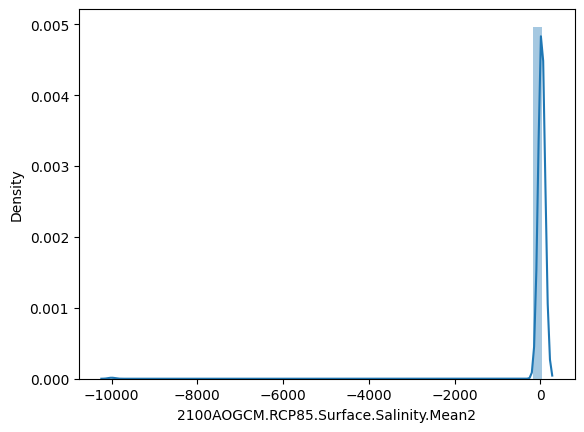

C:\Users\abdul\AppData\Local\Temp\ipykernel_260\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


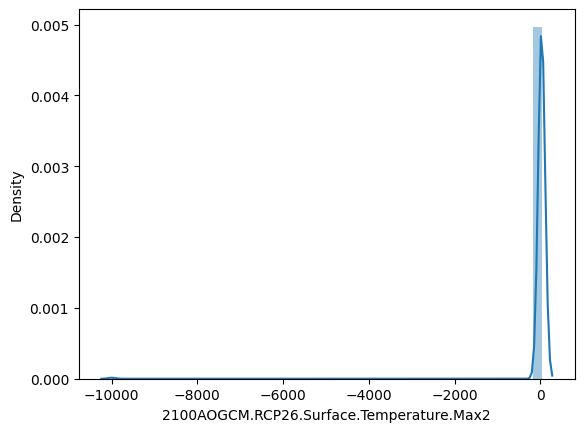

C:\Users\abdul\AppData\Local\Temp\ipykernel_260\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


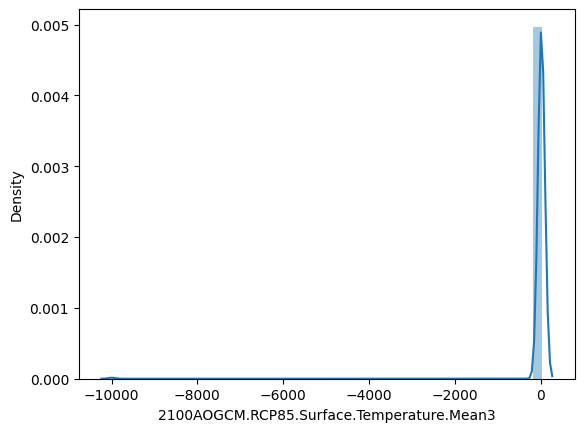

C:\Users\abdul\AppData\Local\Temp\ipykernel_260\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


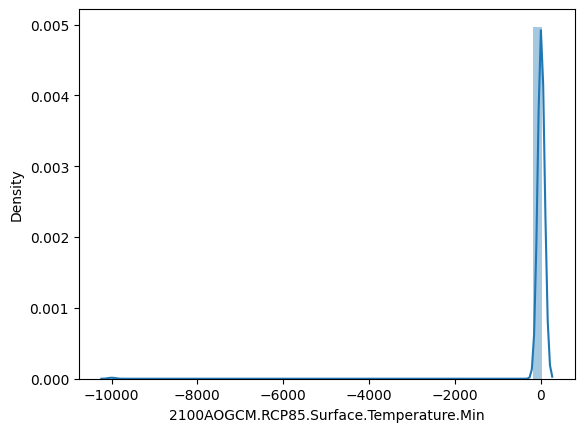

C:\Users\abdul\AppData\Local\Temp\ipykernel_260\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


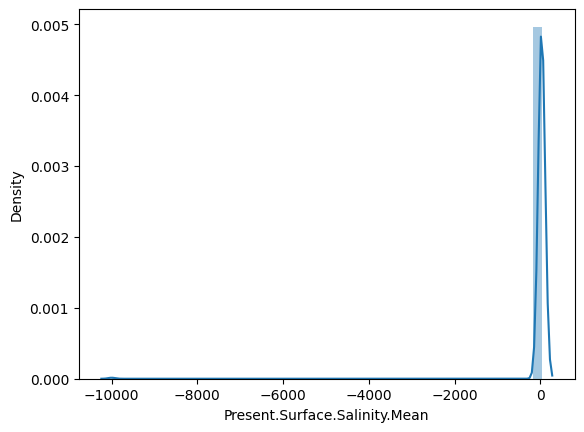

C:\Users\abdul\AppData\Local\Temp\ipykernel_260\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


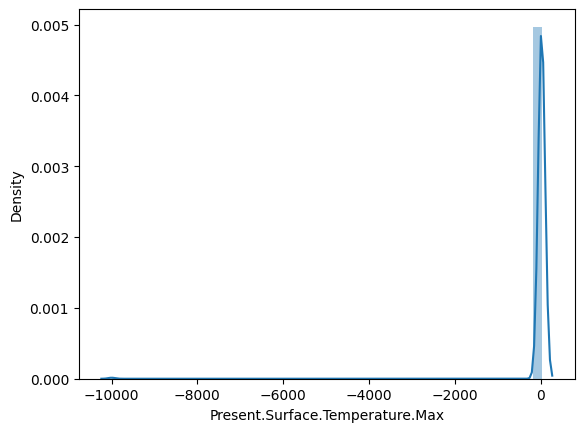

C:\Users\abdul\AppData\Local\Temp\ipykernel_260\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


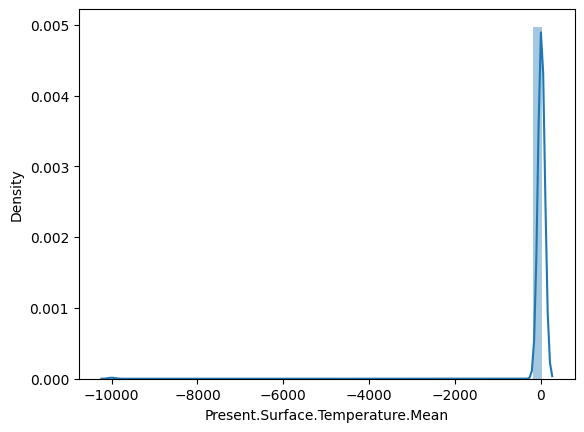

C:\Users\abdul\AppData\Local\Temp\ipykernel_260\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


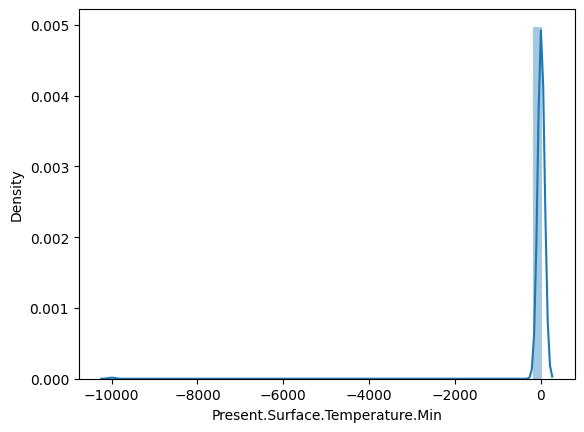

In [20]:
#checking the distribution of all lthe columns using histogram
df.hist(figsize=(20,20), grid=True, layout=(6,4), bins=30)
#checking the distribution of all the numerical columns using distplot
for i in df.columns:
    if df[i].dtype != 'object':
        sns.distplot(df[i])
        plt.show()


In [21]:
#make a copy of df
df1 = df.copy()
df1.head()

,latitude_c,longitude_,species,2050AOGCM.RCP26.Surface.Salinity.Mean,2050AOGCM.RCP26.Surface.Temperature.Max,2050AOGCM.RCP26.Surface.Temperature.Mean,2050AOGCM.RCP26.Surface.Temperature.Min,2050AOGCM.RCP85.Surface.Temperature.Max,2050AOGCM.RCP85.Surface.Salinity.Mean,2100AOGCM.RCP26.Surface.Salinity.Mean,...,2100AOGCM.RCP85.Surface.Salinity.Mean,2100AOGCM.RCP26.Surface.Temperature.Mean,2100AOGCM.RCP85.Surface.Salinity.Mean2,2100AOGCM.RCP26.Surface.Temperature.Max2,2100AOGCM.RCP85.Surface.Temperature.Mean3,2100AOGCM.RCP85.Surface.Temperature.Min,Present.Surface.Salinity.Mean,Present.Surface.Temperature.Max,Present.Surface.Temperature.Mean,Present.Surface.Temperature.Min
0,43.0536,144.9063,Halodule_pinifolia,32.231201,20.718201,9.50725,0.281575,20.949499,9.43316,32.0228,...,32.041599,20.031401,32.041599,20.031401,12.5417,2.54157,32.247695,18.897469,8.248602,-0.89614
1,43.0549,144.9061,Halodule_pinifolia,32.231201,20.718201,9.50725,0.281575,20.949499,9.43316,32.0228,...,32.041599,20.031401,32.041599,20.031401,12.5417,2.54157,32.247695,18.897469,8.248602,-0.89614
2,43.0549,144.9061,Halodule_pinifolia,32.231201,20.718201,9.50725,0.281575,20.949499,9.43316,32.0228,...,32.041599,20.031401,32.041599,20.031401,12.5417,2.54157,32.247695,18.897469,8.248602,-0.89614
3,43.0603,144.9060,Halodule_pinifolia,32.231201,20.718201,9.50725,0.281575,20.949499,9.43316,32.0228,...,32.041599,20.031401,32.041599,20.031401,12.5417,2.54157,32.247695,18.897469,8.248602,-0.89614
4,43.0603,144.9060,Halodule_pinifolia,32.231201,20.718201,9.50725,0.281575,20.949499,9.43316,32.0228,...,32.041599,20.031401,32.041599,20.031401,12.5417,2.54157,32.247695,18.897469,8.248602,-0.89614


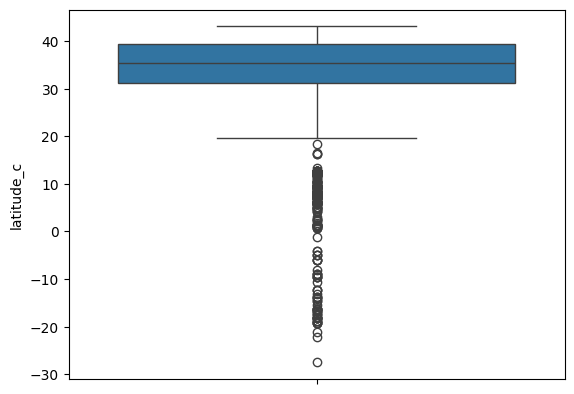

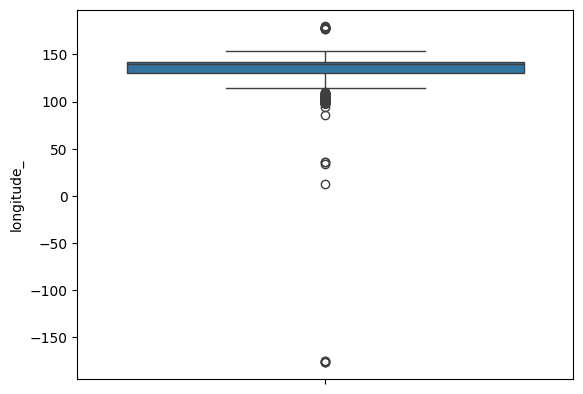

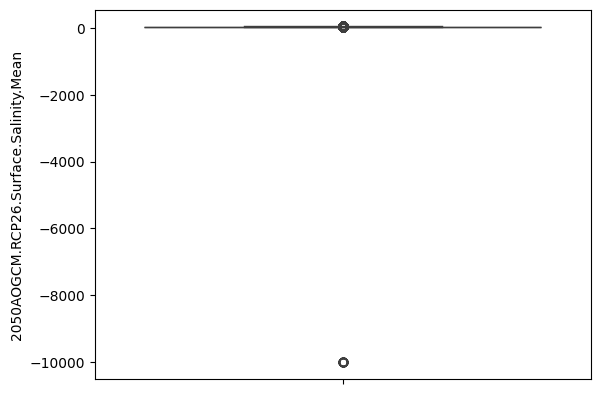

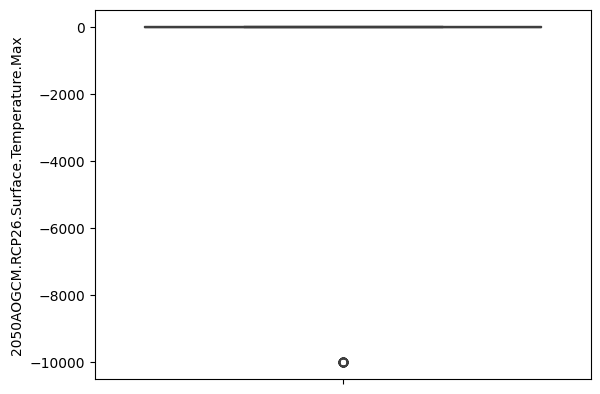

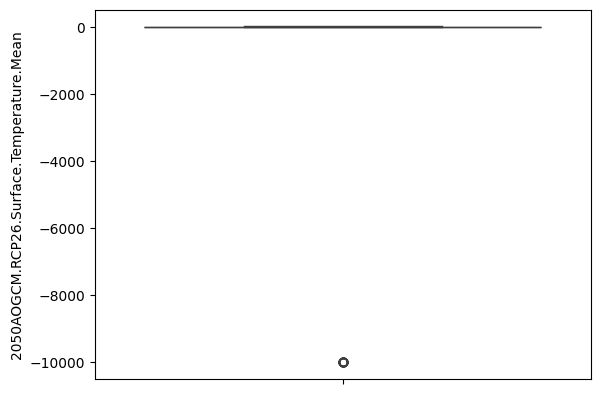

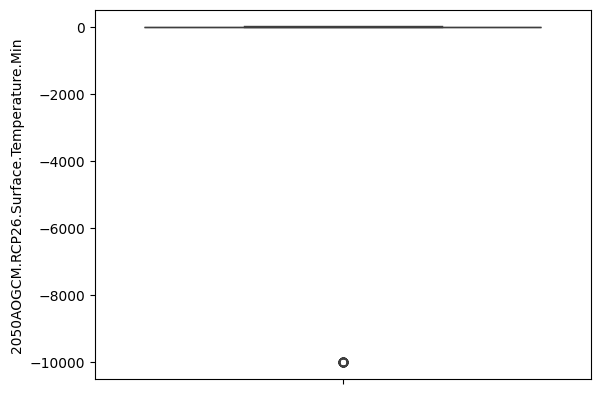

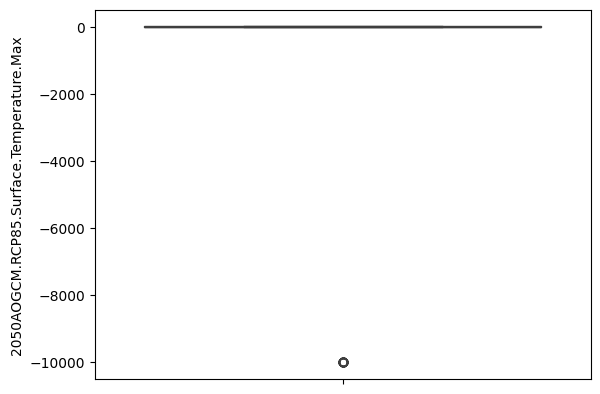

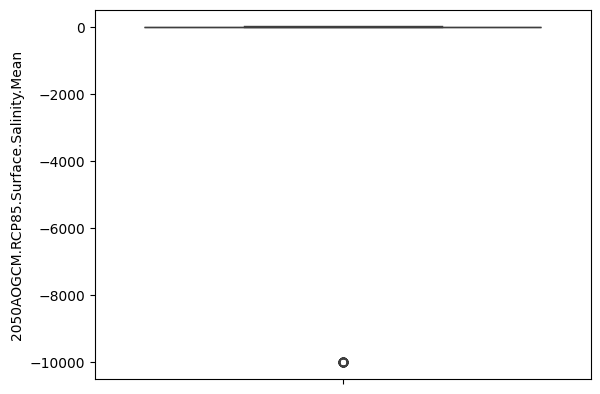

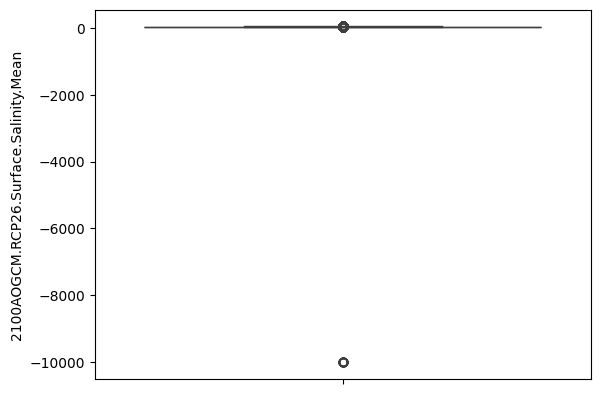

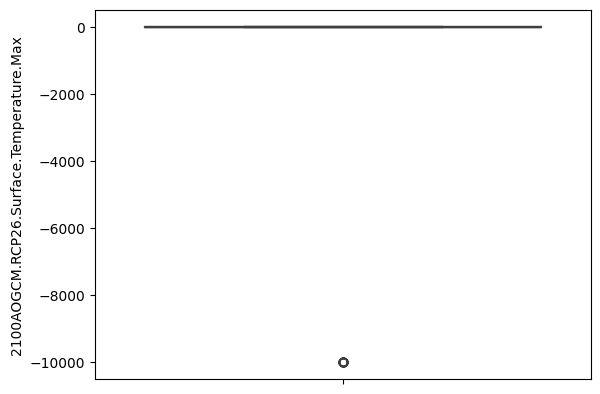

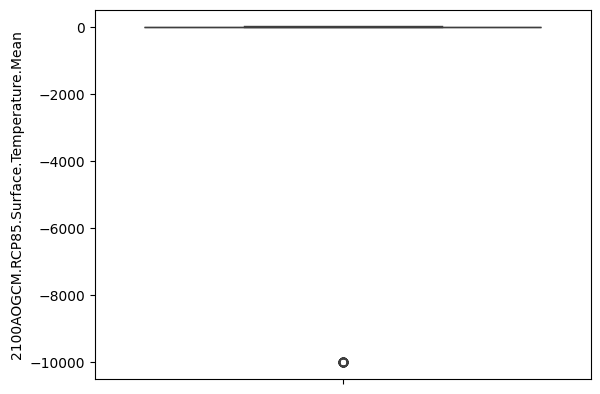

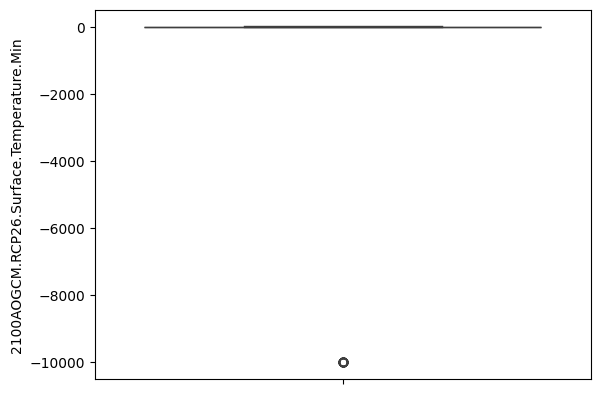

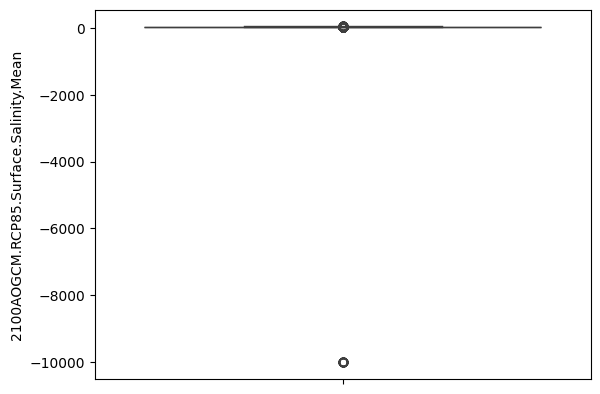

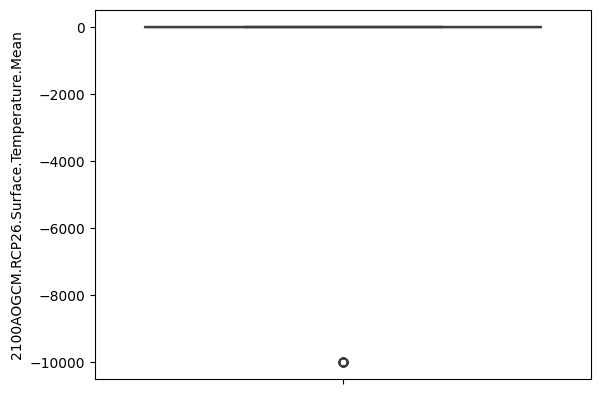

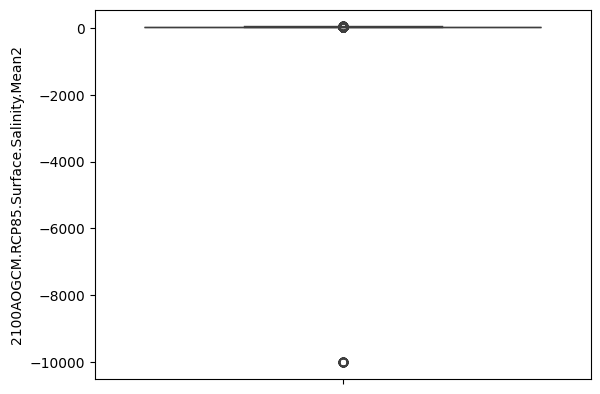

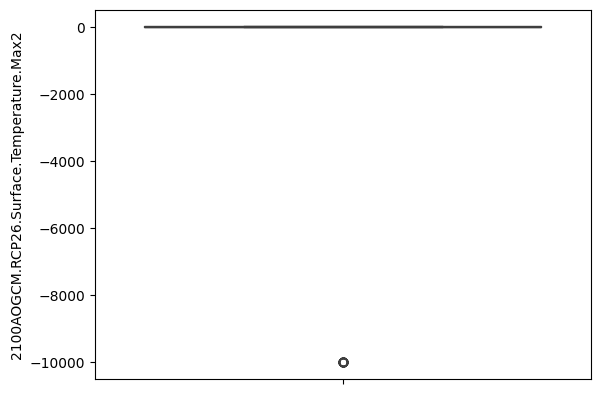

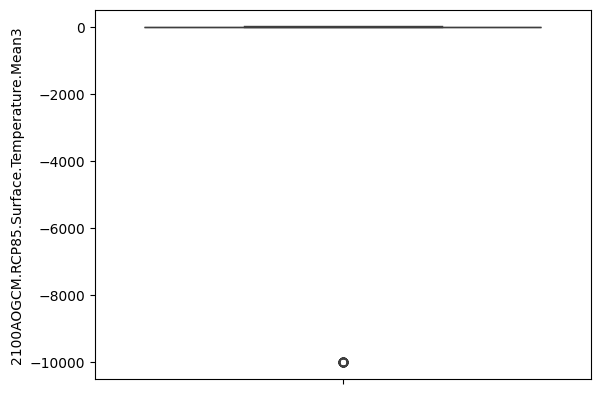

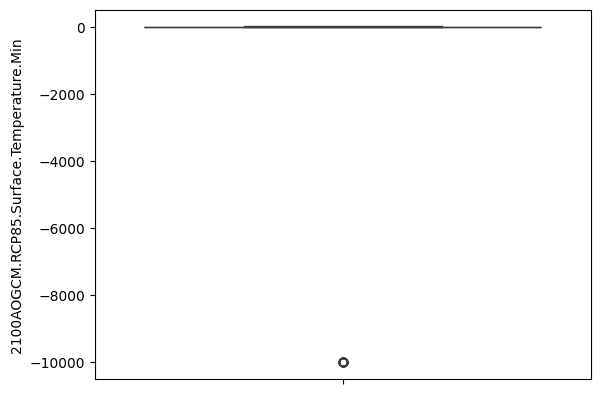

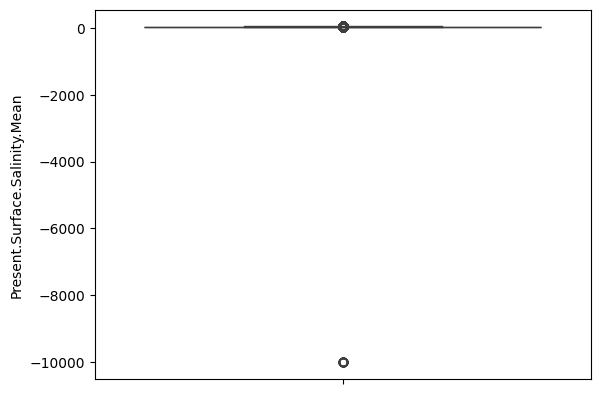

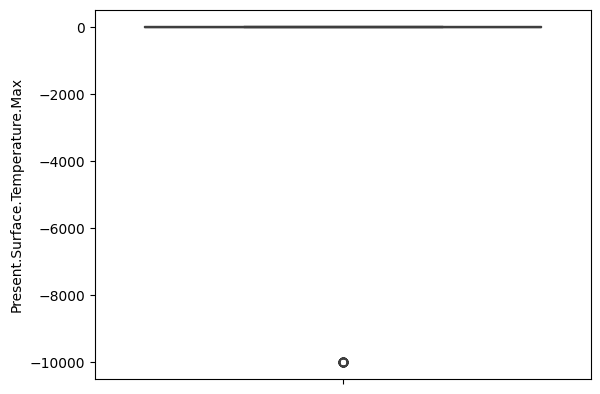

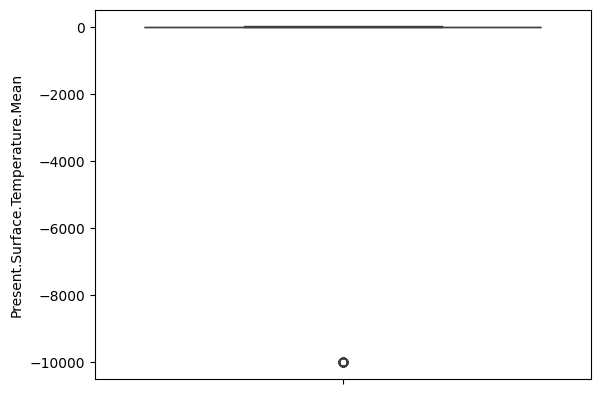

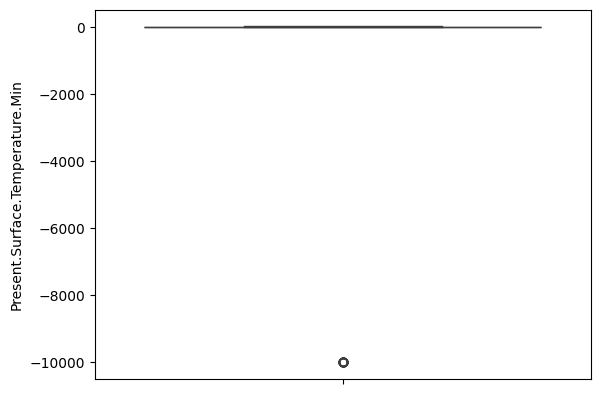

In [22]:
#cheking the distribution of all the columns using boxplot
for i in df1.columns:
    if df1[i].dtype != 'object':
        sns.boxplot(df1[i])
        plt.show()

In [23]:
numeric_cols = df1.select_dtypes(include=[np.number])

# Calculate the IQR for each numeric column
Q1 = numeric_cols.quantile(0.01)
Q3 = numeric_cols.quantile(0.9)
IQR = Q3 - Q1

# Define a multiplier to determine the threshold for outliers
multiplier = 1.5

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - (multiplier * IQR)
upper_bound = Q3 + (multiplier * IQR)

# Identify the outliers using the lower and upper bounds
outliers = ((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)
outlier_indices = outliers[outliers].index

# Remove the outliers from the dataframe
clean_df = df1.drop(outlier_indices)

In [24]:
df.shape

(13236, 23)

In [25]:
clean_df.shape

(13190, 23)

In [26]:
# Split the data into input features (X) and output variables (y)
X = clean_df[['Present.Surface.Salinity.Mean', 'Present.Surface.Temperature.Max', 'Present.Surface.Temperature.Mean','Present.Surface.Temperature.Min']]
y = clean_df[['latitude_c', 'longitude_']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
# List of machine learning models
models = [RandomForestRegressor(random_state=42), Ridge(), Lasso(), ElasticNet(), LinearRegression(), SVR(), MLPRegressor(), KNeighborsRegressor(), GaussianProcessRegressor(), GradientBoostingRegressor(), AdaBoostRegressor(), DecisionTreeRegressor(), BaggingRegressor(), ExtraTreesRegressor(), XGBRegressor()]

# Loop through each model
for model in models:
    # Create the MultiOutputRegressor model
    multi_model = MultiOutputRegressor(model)
    
    # Fit the model on the training data
    multi_model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = multi_model.predict(X_test)
    
    # Calculate and print the score for each output variable
    for i, target in enumerate(multi_model.estimators_):
        score = target.score(X_test, y_test.iloc[:, i])
        print(f"Score for output variable {i+1} using {type(model).__name__}: {score}")


Score for output variable 1 using RandomForestRegressor: 0.9849372911950209
Score for output variable 2 using RandomForestRegressor: 0.9924348327231591
Score for output variable 1 using Ridge: 0.8525370627470403
Score for output variable 2 using Ridge: 0.8042333079351296
Score for output variable 1 using Lasso: 0.7655260416174866
Score for output variable 2 using Lasso: 0.7175306716372272
Score for output variable 1 using ElasticNet: 0.7830728035936909
Score for output variable 2 using ElasticNet: 0.7233407027281586
Score for output variable 1 using LinearRegression: 0.8524898966435741
Score for output variable 2 using LinearRegression: 0.8042933706783785
Score for output variable 1 using SVR: 0.8663920574232675
Score for output variable 2 using SVR: 0.7999324985723633


c:\Users\abdul\anaconda3\envs\three_specie\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Score for output variable 1 using MLPRegressor: 0.873456489171654
Score for output variable 2 using MLPRegressor: 0.8189032466670091
Score for output variable 1 using KNeighborsRegressor: 0.9677013437438837
Score for output variable 2 using KNeighborsRegressor: 0.9913758497466814
Score for output variable 1 using GaussianProcessRegressor: 0.9133593196612557
Score for output variable 2 using GaussianProcessRegressor: 0.34678841933312776
Score for output variable 1 using GradientBoostingRegressor: 0.9860700556839652
Score for output variable 2 using GradientBoostingRegressor: 0.9941869195224603
Score for output variable 1 using AdaBoostRegressor: 0.9714023058017818
Score for output variable 2 using AdaBoostRegressor: 0.9300738704598432
Score for output variable 1 using DecisionTreeRegressor: 0.9769889100141332
Score for output variable 2 using DecisionTreeRegressor: 0.9951872034932537
Score for output variable 1 using BaggingRegressor: 0.9834020099585423
Score for output variable 2 using

In [28]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor

# Instantiate the individual regression models
rf_model = RandomForestRegressor(random_state=42)
knn_model = KNeighborsRegressor()
gb_model = GradientBoostingRegressor()

# Create the MultiOutputRegressor model
ensemble_model = MultiOutputRegressor(estimator=VotingRegressor(estimators=[('rf', rf_model), ('knn', knn_model), ('gb', gb_model)]))

# Fit the model on the training data
ensemble_model.fit(X_train, y_train)

# Predict on the test data
y_pred = ensemble_model.predict(X_test)

# Calculate and print the score for each output variable
for i, target in enumerate(ensemble_model.estimators_):
    score = target.score(X_test, y_test.iloc[:, i])
    print(f"Score for output variable {i+1}: {score}")


Score for output variable 1: 0.9834736703294746
Score for output variable 2: 0.9942500920312863


In [29]:
# Create and train the multi-output regression model
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train, y_train)

# Print the model's score
print(model.score(X_test, y_test))

0.98868606195909


In [30]:
#checking score for each output variable
print(model.estimators_[0].score(X_test, y_test.iloc[:,0]))
print(model.estimators_[1].score(X_test, y_test.iloc[:,1]))


0.9849372911950209
0.9924348327231591


# wihtou toutlier removal the accuraffcy in rf is
Score for output variable 1: 0.9789397406694311
Score for output variable 2: 0.7868206127535216

In [31]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# Create the MultiOutputRegressor model
rf_model = MultiOutputRegressor(RandomForestRegressor(random_state=42))

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf_model = rf_model.predict(X_test)

# Calculate and print the score for each output variable
for i, target in enumerate(model.estimators_):
    score = target.score(X_test, y_test.iloc[:, i])
    print(f"Score for output variable {i+1}: {score}")


Score for output variable 1: 0.9849372911950209
Score for output variable 2: 0.9924348327231591


In [32]:


# Create the MultiOutputRegressor model
xgb_model = MultiOutputRegressor(XGBRegressor(random_state=42))

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_xgb_model = xgb_model.predict(X_test)

# Calculate and print the score for each output variable
for i, target in enumerate(xgb_model.estimators_):
    score = target.score(X_test, y_test.iloc[:, i])
    print(f"Score for output variable {i+1}: {score}")




Score for output variable 1: 0.9737367573821006
Score for output variable 2: 0.9935136312372024


In [33]:
# Create the ensemble model by averaging the predictions
ensemble_predictions = (y_pred_rf_model + y_pred_xgb_model) / 2

In [34]:
# Evaluate the mean squared error of individual models
rf_mse = mean_squared_error(y_test, y_pred_rf_model)
xgb_mse = mean_squared_error(y_test, y_pred_xgb_model)
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)

print("Random Forest MSE:", rf_mse)
print("XGBoost MSE:", xgb_mse)
print("Ensemble MSE:", ensemble_mse)


Random Forest MSE: 0.7506702716820834
XGBoost MSE: 1.0640050172805786
Ensemble MSE: 0.8189756356455882


In [35]:
# pickle the random forest model
import pickle
pickle.dump(rf_model, open('rf_halodule_current_distribution.pkl', 'wb'))

# predictinf futreu of 2050

In [36]:
# 2050AOGCM.RCP26.Surface.Salinity.Mean        0
# 2050AOGCM.RCP26.Surface.Temperature.Max      0
# 2050AOGCM.RCP26.Surface.Temperature.Mean     0
# 2050AOGCM.RCP26.Surface.Temperature.Min      0
# 2050AOGCM.RCP85.Surface.Temperature.Max      0
# 2050AOGCM.RCP85.Surface.Salinity.Mean

In [37]:
# Split the data into input features (X) and output variables (y)
X_50 = clean_df[['2050AOGCM.RCP26.Surface.Salinity.Mean', '2050AOGCM.RCP26.Surface.Temperature.Max', '2050AOGCM.RCP26.Surface.Temperature.Mean','2050AOGCM.RCP26.Surface.Temperature.Min','2050AOGCM.RCP85.Surface.Temperature.Max','2050AOGCM.RCP85.Surface.Salinity.Mean']]
y_50 = clean_df[['latitude_c', 'longitude_']]

# Split the data into training and testing sets
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X_50, y_50, test_size=0.2)

In [38]:
X_50.shape

(13190, 6)

In [39]:
X_train_50.shape

(10552, 6)

In [40]:
# List of machine learning models
models = [RandomForestRegressor(random_state=42), Ridge(), Lasso(), ElasticNet(), LinearRegression(), SVR(), MLPRegressor(), KNeighborsRegressor(), GaussianProcessRegressor(), GradientBoostingRegressor(), AdaBoostRegressor(), DecisionTreeRegressor(), BaggingRegressor(), ExtraTreesRegressor(), XGBRegressor()]

# Loop through each model
for model in models:
    # Create the MultiOutputRegressor model
    multi_model = MultiOutputRegressor(model)
    
    # Fit the model on the training data
    multi_model.fit(X_train_50, y_train_50)
    
    # Predict on the test data
    y_pred = multi_model.predict(X_test_50)
    
    # Calculate and print the score for each output variable
    for i, target in enumerate(multi_model.estimators_):
        score = target.score(X_test_50, y_test_50.iloc[:, i])
        print(f"Score for output variable {i+1} using {type(model).__name__}: {score}")


Score for output variable 1 using RandomForestRegressor: 0.9963457620428634
Score for output variable 2 using RandomForestRegressor: 0.9896546354790374
Score for output variable 1 using Ridge: 0.8926171919906071
Score for output variable 2 using Ridge: 0.8954410855368667
Score for output variable 1 using Lasso: 0.8016888010191952
Score for output variable 2 using Lasso: 0.7637539502599582
Score for output variable 1 using ElasticNet: 0.819156046893135
Score for output variable 2 using ElasticNet: 0.7746241834654541
Score for output variable 1 using LinearRegression: 0.8904394048117997
Score for output variable 2 using LinearRegression: 0.9026697768300094
Score for output variable 1 using SVR: 0.9116240230180528
Score for output variable 2 using SVR: 0.8729297261083435
Score for output variable 1 using MLPRegressor: 0.9069774623177022
Score for output variable 2 using MLPRegressor: 0.8318762042627055
Score for output variable 1 using KNeighborsRegressor: 0.9930600870542794
Score for out

In [41]:
# Create and train the multi-output regression model
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train_50, y_train_50)

# Print the model's score
print(model.score(X_test_50, y_test_50))


0.9930001987609505


In [42]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# Create the MultiOutputRegressor model
rf_model = MultiOutputRegressor(RandomForestRegressor(random_state=42))

# Fit the model on the training data
rf_model.fit(X_train_50, y_train_50)

# Predict on the test data
y_pred_rf_model_50 = rf_model.predict(X_test_50)

# Calculate and print the score for each output variable
for i, target in enumerate(model.estimators_):
    score = target.score(X_test_50, y_test_50.iloc[:, i])
    print(f"Score for output variable {i+1}: {score}")


Score for output variable 1: 0.9963457620428634
Score for output variable 2: 0.9896546354790374


In [43]:
# Create the MultiOutputRegressor model
xgb_model_50 = MultiOutputRegressor(XGBRegressor(random_state=42))

# Fit the model on the training data
xgb_model_50.fit(X_train_50, y_train_50)

# Predict on the test data
y_pred_xgb_model_50 = xgb_model_50.predict(X_test_50)

# Calculate and print the score for each output variable
for i, target in enumerate(xgb_model_50.estimators_):
    score_50 = target.score(X_test_50, y_test_50.iloc[:, i])
    print(f"Score for output variable {i+1}: {score_50}")


Score for output variable 1: 0.9933843646504826
Score for output variable 2: 0.988609641382508


In [44]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Instantiate the individual regression models
rf_model2 = RandomForestRegressor()
xgb_model2 = XGBRegressor()

# Create the voting regressor
voting = MultiOutputRegressor(VotingRegressor(estimators=[('rf', rf_model2), ('xg', xgb_model2)]))

# Fit the voting regressor to the training data
voting.fit(X_train_50, y_train_50)


MultiOutputRegressor(estimator=VotingRegressor(estimators=[('rf',
                                                            RandomForestRegressor()),
                                                           ('xg',
                                                            XGBRegressor(base_score=None,
                                                                         booster=None,
                                                                         callbacks=None,
                                                                         colsample_bylevel=None,
                                                                         colsample_bynode=None,
                                                                         colsample_bytree=None,
                                                                         device=None,
                                                                         early_stopping_rounds=None,
                                                                         enable_categorical=False,
                                                                         eval_metric=None,
                                                                         feature_types=None,
                                                                         feature_weights=None,
                                                                         gamma=None,
                                                                         grow_policy=None,
                                                                         importance_type=None,
                                                                         interaction_constraints=None,
                                                                         learning_rate=None,
                                                                         max_bin=None,
                                                                         max_cat_threshold=None,
                                                                         max_cat_to_onehot=None,
                                                                         max_delta_step=None,
                                                                         max_depth=None,
                                                                         max_leaves=None,
                                                                         min_child_weight=None,
                                                                         missing=nan,
                                                                         monotone_constraints=None,
                                                                         multi_strategy=None,
                                                                         n_estimators=None,
                                                                         n_jobs=None,
                                                                         num_parallel_tree=None, ...))]))

In [45]:
# predict on the test data
y_pred_voting = voting.predict(X_test_50)

#eva;ute the score for each output variable
for i, target in enumerate(voting.estimators_):
    score = target.score(X_test_50, y_test_50.iloc[:, i])
    print(f"Score for output variable {i+1}: {score}")

# Calculate and print the score for the combined model
score_voting = voting.score(X_test_50, y_test_50)
print(f"Voting Score: {score_voting}")

Score for output variable 1: 0.9952333760328531
Score for output variable 2: 0.9901641638881906
Voting Score: 0.9926987699605219


In [46]:
#mse for three models
rf_mse_50 = mean_squared_error(y_test_50, y_pred_rf_model_50)
xgb_mse_50 = mean_squared_error(y_test_50, y_pred_xgb_model_50)
voting_mse_50 = mean_squared_error(y_test_50, y_pred_voting)

print("Random Forest MSE:", rf_mse_50)
print("XGBoost MSE:", xgb_mse_50)
print("Ensemble MSE:", voting_mse_50)

Random Forest MSE: 0.39465945373142564
XGBoost MSE: 0.500406801700592
Ensemble MSE: 0.4080669947900652


In [47]:
#dump xgb model
import pickle
pickle.dump(xgb_model_50, open('xgb_halodule_pinifolia_2050.pkl', 'wb'))

In [48]:

#dump model using pickle
import pickle
pickle.dump(voting, open('voting_halodule_2050_new','wb'))

_______________

# 100 prediciton

In [49]:
# 2100AOGCM.RCP26.Surface.Salinity.Mean        0
# 2100AOGCM.RCP26.Surface.Temperature.Max      0
# 2100AOGCM.RCP26.Surface.Temperature.Min      0
# 2100AOGCM.RCP26.Surface.Temperature.Mean     0
# 2100AOGCM.RCP26.Surface.Temperature.Max2     0

# 2100AOGCM.RCP85.Surface.Temperature.Mean     0
# 2100AOGCM.RCP85.Surface.Salinity.Mean        0
# 2100AOGCM.RCP85.Surface.Salinity.Mean2       0
# 2100AOGCM.RCP85.Surface.Temperature.Mean3    0
# 2100AOGCM.RCP85.Surface.Temperature.Min      0

In [50]:
# Split the data into input features (X) and output variables (y)
X_100 = clean_df[['2100AOGCM.RCP26.Surface.Salinity.Mean', '2100AOGCM.RCP26.Surface.Temperature.Max', '2100AOGCM.RCP26.Surface.Temperature.Min','2100AOGCM.RCP26.Surface.Temperature.Mean','2100AOGCM.RCP26.Surface.Temperature.Max2','2100AOGCM.RCP85.Surface.Temperature.Mean','2100AOGCM.RCP85.Surface.Salinity.Mean','2100AOGCM.RCP85.Surface.Salinity.Mean2','2100AOGCM.RCP85.Surface.Temperature.Mean3','2100AOGCM.RCP85.Surface.Temperature.Min']]
y_100 = clean_df[['latitude_c', 'longitude_']]

# Split the data into training and testing sets
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(X_100, y_100, test_size=0.2)

In [51]:
# List of machine learning models
models = [RandomForestRegressor(random_state=42), Ridge(), Lasso(), ElasticNet(), LinearRegression(), SVR(), MLPRegressor(), KNeighborsRegressor(), GaussianProcessRegressor(), GradientBoostingRegressor(), AdaBoostRegressor(), DecisionTreeRegressor(), BaggingRegressor(), ExtraTreesRegressor(), XGBRegressor()]

# Loop through each model
for model in models:
    # Create the MultiOutputRegressor model
    multi_model = MultiOutputRegressor(model)
    
    # Fit the model on the training data
    multi_model.fit(X_train_100, y_train_100)
    
    # Predict on the test data
    y_pred = multi_model.predict(X_test_100)
    
    # Calculate and print the score for each output variable
    for i, target in enumerate(multi_model.estimators_):
        score = target.score(X_test_100, y_test_100.iloc[:, i])
        print(f"Score for output variable {i+1} using {type(model).__name__}: {score}")


Score for output variable 1 using RandomForestRegressor: 0.9789272646440821
Score for output variable 2 using RandomForestRegressor: 0.990647370575344
Score for output variable 1 using Ridge: 0.9552787691195384
Score for output variable 2 using Ridge: 0.8922107717511591
Score for output variable 1 using Lasso: 0.8240455199357924
Score for output variable 2 using Lasso: 0.7466941558458358
Score for output variable 1 using ElasticNet: 0.8482727014464386
Score for output variable 2 using ElasticNet: 0.7711585435001755
Score for output variable 1 using LinearRegression: 0.9551693238088454
Score for output variable 2 using LinearRegression: 0.8921594446699602
Score for output variable 1 using SVR: 0.9249230005340554
Score for output variable 2 using SVR: 0.864261725382401


c:\Users\abdul\anaconda3\envs\three_specie\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Score for output variable 1 using MLPRegressor: 0.9210504851388116
Score for output variable 2 using MLPRegressor: 0.8864572119099003
Score for output variable 1 using KNeighborsRegressor: 0.9778210264684533
Score for output variable 2 using KNeighborsRegressor: 0.9955183876394627
Score for output variable 1 using GaussianProcessRegressor: 0.9877563264062255
Score for output variable 2 using GaussianProcessRegressor: 0.7809367924670696
Score for output variable 1 using GradientBoostingRegressor: 0.9834285396812993
Score for output variable 2 using GradientBoostingRegressor: 0.9936743531080748
Score for output variable 1 using AdaBoostRegressor: 0.9212132356258431
Score for output variable 2 using AdaBoostRegressor: 0.8670652049124123
Score for output variable 1 using DecisionTreeRegressor: 0.9603728591533854
Score for output variable 2 using DecisionTreeRegressor: 0.9890184893579463
Score for output variable 1 using BaggingRegressor: 0.9757818789502984
Score for output variable 2 using

In [52]:
# Score for output variable 1 using RandomForestRegressor: 0.9804583712380089
# Score for output variable 2 using RandomForestRegressor: 0.9919022254674357
# Score for output variable 1 using Ridge: 0.9328695624551822
# Score for output variable 2 using Ridge: 0.8752393432830001
# Score for output variable 1 using Lasso: 0.7855084389963075
# Score for output variable 2 using Lasso: 0.7471772039354501
# Score for output variable 1 using ElasticNet: 0.8094699678401349
# Score for output variable 2 using ElasticNet: 0.7717358263595273
# Score for output variable 1 using LinearRegression: 0.9338589893955782
# Score for output variable 2 using LinearRegression: 0.8763036280068827
# Score for output variable 1 using SVR: 0.8782866438004283
# Score for output variable 2 using SVR: 0.854899883167314
# c:\Users\AbdulRaheemShahzad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
#   warnings.warn(
# Score for output variable 1 using MLPRegressor: 0.8813979459440389
# Score for output variable 2 using MLPRegressor: 0.8853276448383093
# Score for output variable 1 using KNeighborsRegressor: 0.9650839804447817
# Score for output variable 2 using KNeighborsRegressor: 0.9903467750840643
# Score for output variable 1 using GaussianProcessRegressor: 0.9854604714799619
# Score for output variable 2 using GaussianProcessRegressor: 0.5682879376984955
# Score for output variable 1 using GradientBoostingRegressor: 0.9846473820476964
# Score for output variable 2 using GradientBoostingRegressor: 0.992921261874542
# Score for output variable 1 using AdaBoostRegressor: 0.9667183652036192
# Score for output variable 2 using AdaBoostRegressor: 0.9733667244741877
# Score for output variable 1 using DecisionTreeRegressor: 0.9723924530924298
# Score for output variable 2 using DecisionTreeRegressor: 0.9880007027260507
# Score for output variable 1 using BaggingRegressor: 0.9824826802853842
# Score for output variable 2 using BaggingRegressor: 0.9894297958093817
# Score for output variable 1 using ExtraTreesRegressor: 0.9814640336452026
# Score for output variable 2 using ExtraTreesRegressor: 0.9918462889775549
# Score for output variable 1 using XGBRegressor: 0.9924034764483955
# Score for output variable 2 using XGBRegressor: 0.9944387743746613


In [53]:
# Create and train the multi-output regression model
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train_100, y_train_100)

# Print the model's score
print(model.score(X_test_100, y_test_100))

0.984787317609713


In [54]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# Create the MultiOutputRegressor model
rf_model_100 = MultiOutputRegressor(RandomForestRegressor(random_state=42))

# Fit the model on the training data
rf_model_100.fit(X_train_100, y_train_100)

# Predict on the test data
y_pred_rf_model_100 = rf_model_100.predict(X_test_100)

# Calculate and print the score for each output variable
for i, target in enumerate(rf_model_100.estimators_):
    score_100 = target.score(X_test_100, y_test_100.iloc[:, i])
    print(f"Score for output variable {i+1}: {score_100}")


Score for output variable 1: 0.9789272646440821
Score for output variable 2: 0.990647370575344


In [55]:
# Create the MultiOutputRegressor model
xgb_model_100 = MultiOutputRegressor(XGBRegressor(random_state=42))

# Fit the model on the training data
xgb_model_100.fit(X_train_100, y_train_100)

# Predict on the test data
y_pred_xgb_model_100 = xgb_model_100.predict(X_test_100)

# Calculate and print the score for each output variable
for i, target in enumerate(xgb_model_100.estimators_):
    score_100 = target.score(X_test_100, y_test_100.iloc[:, i])
    print(f"Score for output variable {i+1}: {score_100}")


Score for output variable 1: 0.9978992964770278
Score for output variable 2: 0.9835701707684626


In [56]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Instantiate the individual regression models
rf_model3 = RandomForestRegressor()
xgb_model3 = XGBRegressor()

# Create the voting regressor
voting = MultiOutputRegressor(VotingRegressor(estimators=[('rf', rf_model3), ('xg', xgb_model3)]))

# Fit the voting regressor to the training data
voting.fit(X_train_100, y_train_100)


MultiOutputRegressor(estimator=VotingRegressor(estimators=[('rf',
                                                            RandomForestRegressor()),
                                                           ('xg',
                                                            XGBRegressor(base_score=None,
                                                                         booster=None,
                                                                         callbacks=None,
                                                                         colsample_bylevel=None,
                                                                         colsample_bynode=None,
                                                                         colsample_bytree=None,
                                                                         device=None,
                                                                         early_stopping_rounds=None,
                                                                         enable_categorical=False,
                                                                         eval_metric=None,
                                                                         feature_types=None,
                                                                         feature_weights=None,
                                                                         gamma=None,
                                                                         grow_policy=None,
                                                                         importance_type=None,
                                                                         interaction_constraints=None,
                                                                         learning_rate=None,
                                                                         max_bin=None,
                                                                         max_cat_threshold=None,
                                                                         max_cat_to_onehot=None,
                                                                         max_delta_step=None,
                                                                         max_depth=None,
                                                                         max_leaves=None,
                                                                         min_child_weight=None,
                                                                         missing=nan,
                                                                         monotone_constraints=None,
                                                                         multi_strategy=None,
                                                                         n_estimators=None,
                                                                         n_jobs=None,
                                                                         num_parallel_tree=None, ...))]))

In [57]:
# predict on the test data
y_pred_voting = voting.predict(X_test_100)

#eva;ute the score for each output variable
for i, target in enumerate(voting.estimators_):
    score = target.score(X_test_100, y_test_100.iloc[:, i])
    print(f"Score for output variable {i+1}: {score}")

# Calculate and print the score for the combined model
score_voting = voting.score(X_test_100, y_test_100)
print(f"Voting Score: {score_voting}")

Score for output variable 1: 0.9929091461166636
Score for output variable 2: 0.9892708038406998
Voting Score: 0.9910899749786817


In [58]:
#mse for three models
rf_mse_100 = mean_squared_error(y_test_100, y_pred_rf_model_100)
xgb_mse_100 = mean_squared_error(y_test_100, y_pred_xgb_model_100)
voting_mse_100 = mean_squared_error(y_test_100, y_pred_voting)

print("Random Forest MSE:", rf_mse_100)
print("XGBoost MSE:", xgb_mse_100)
print("Ensemble MSE:", voting_mse_100)

Random Forest MSE: 0.9019466682099175
XGBoost MSE: 0.6395598649978638
Ensemble MSE: 0.5724125349397036


In [59]:
#dump xgb model
import pickle
pickle.dump(xgb_model_100, open('xgb_halodule_pinifolia_2100.pkl', 'wb'))

In [60]:
#dump model using pickle
import pickle
pickle.dump(voting, open('voting_halodule_2100','wb'))
